<font size="5">Importing python packages </font>

In [1]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import WordNetLemmatizer


# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import accuracy_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

<font size="5">Reading and performing basic analysis of the data</font>

In [2]:
data = pd.read_csv('slot_reviews_V4.csv')
data.head(5)

,Date,Stars,Sentiment_rating,Text
0,2-14W,4-stars or above,Advertising,"If you still give us a lot of ads, let them be..."
1,2-14W,4-stars or above,Positive,"Great casino so far, nice machines"
2,2-14W,4-stars or above,Positive,you are ksk
3,2-14W,4-stars or above,Positive,Fun games
4,2-14W,4-stars or above,Positive,Very good


In [3]:
percent_val = 100 * data['Stars'].value_counts()/len(data)
percent_val

4-stars or above    80.078508
3-stars or below    19.921492
Name: Stars, dtype: float64

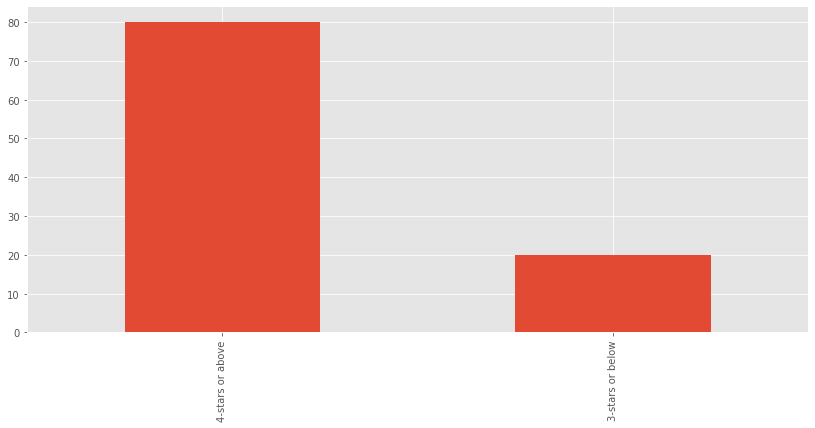

In [4]:
percent_val.plot.bar()
plt.show()

<font size="3">Since there is a class imbalance, I am going to handle by standardizing the ratings.</font>

<font size="5">Standardizing the ratings for sentiment analysis </font>

In [5]:
df_reviews=pd.concat([data.Sentiment_rating,data.Text],axis=1)
df_reviews.dropna(axis=0,inplace=True)
df_reviews.head(5)

,Sentiment_rating,Text
0,Advertising,"If you still give us a lot of ads, let them be..."
1,Positive,"Great casino so far, nice machines"
2,Positive,you are ksk
3,Positive,Fun games
4,Positive,Very good


In [6]:
def numerical_convertion(df_reviews):
    df_reviews.replace(to_replace ="Positive", value =0, inplace=True)
    df_reviews.replace(to_replace ="Numerical", value =1, inplace=True)
    df_reviews.replace(to_replace ="Technician Issues", value =1, inplace=True)
    df_reviews.replace(to_replace ="Advertising", value =1, inplace=True)
    df_reviews.replace(to_replace ="Graphic", value =0, inplace=True)
    df_reviews.replace(to_replace ="General Questions", value =2, inplace=True)

In [7]:
numerical_convertion(df_reviews["Sentiment_rating"])
df_reviews.Sentiment_rating.value_counts()

0    601
1    358
2     56
Name: Sentiment_rating, dtype: int64

<AxesSubplot:xlabel='Sentiment_rating', ylabel='count'>

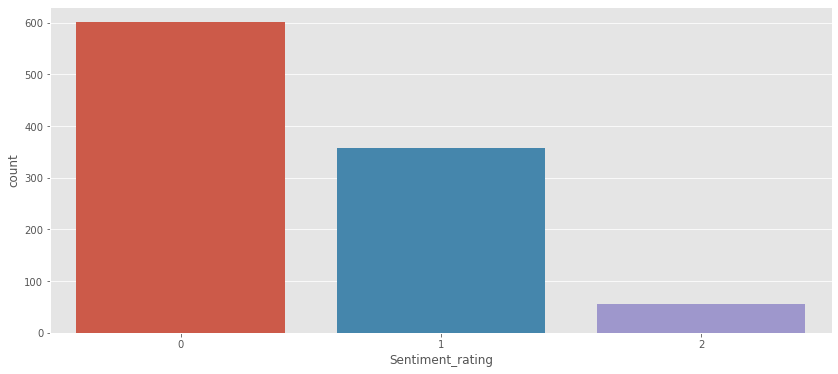

In [8]:
sns.countplot(df_reviews.Sentiment_rating)

<font size="3">Positive rating = 0, Negative rating =1, Neutral rating= 2 </font>

<font size="5">Data Pre-processing</font>

<font size="5">Lemmatization</font>

In [9]:
lm = WordNetLemmatizer()
def text_transformation(df_col):
    text_list = []
    for text in df_col:
        text = re.sub('[^a-zA-Z]',' ',str(text))
        text = text.lower()
        text = nltk.word_tokenize(text)
        text = [lm.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
        text_list.append(' '.join(str(x) for x in text))
    return text_list

In [10]:
df_reviews['Text_new'] = text_transformation(df_reviews['Text'])

In [11]:
#review the changes
print(df_reviews['Text'][1])
print(df_reviews['Text_new'][1])

Great casino so far, nice machines
great casino far nice machine


In [12]:
token_lists = [word_tokenize(each) for each in df_reviews['Text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens now:  1409


<font size="5">Bag-of-words</font>

In [13]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vc = CountVectorizer()
X = vc.fit_transform(df_reviews['Text_new'])
df = pd.DataFrame(X.toarray(), columns = vc.get_feature_names())
df.head()

,able,abnormal,absolute,absolutely,acceleration,acceptable,access,accordingly,account,accrued,...,yep,yes,yet,yo,yoi,youll,youtube,yummy,zero,zeroing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


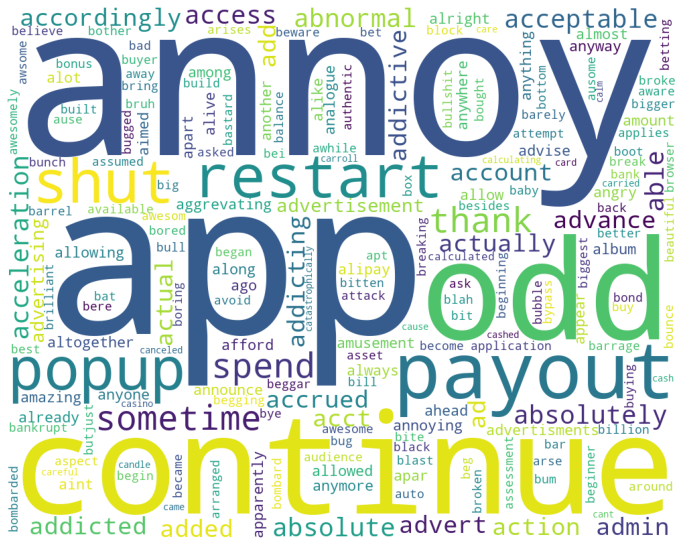

In [14]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1000,height=800).generate(" ".join(df))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<font size="3">Here are the most used words</font>

<font size="5">Creating CountVector</font>

In [15]:
bow_counts = CountVectorizer(tokenizer= word_tokenize, 
                            ngram_range=(1,1)) 
bow_data = bow_counts.fit_transform(df_reviews['Text_new'])

In [16]:
bow_data


<1015x1409 sparse matrix of type '<class 'numpy.int64'>'
	with 5929 stored elements in Compressed Sparse Row format>

<font size="5">Divided the dataset into training and test sets</font>

In [17]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    df_reviews['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 50)

In [18]:
y_test_bow.value_counts()/y_test_bow.shape[0]

0    0.635468
1    0.305419
2    0.059113
Name: Sentiment_rating, dtype: float64

<font size="5">Applying logistic regression</font>

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
clf = LogisticRegression()
clf.fit(X_train_bow, y_train_bow)
y_pred = clf.predict(X_test_bow)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_bow, y_pred)

0.8571428571428571

In [20]:
confusion_matrix(y_test_bow, y_pred)

array([[124,   5,   0],
       [ 16,  45,   1],
       [  4,   3,   5]])

In [21]:
print(classification_report(y_test_bow, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       129
           1       0.85      0.73      0.78        62
           2       0.83      0.42      0.56        12

    accuracy                           0.86       203
   macro avg       0.85      0.70      0.75       203
weighted avg       0.86      0.86      0.85       203



In [22]:
#1. Increasing the n-grams to see if the result change (1-gram, 2-gram, 3-gram, and 4-gram)
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))
bow_data = bow_counts.fit_transform(df_reviews.Text_new)

In [23]:
bow_data

<1015x14242 sparse matrix of type '<class 'numpy.int64'>'
	with 19887 stored elements in Compressed Sparse Row format>

In [24]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    df_reviews['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 50)

In [25]:
clf = LogisticRegression(max_iter = 200)
clf.fit(X_train_bow, y_train_bow)
y_pred = clf.predict(X_test_bow)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_bow, y_pred)

0.8571428571428571

<font size="3">change the parameter does not change the overall performance</font>

In [26]:
confusion_matrix(y_test_bow, y_pred)

array([[125,   4,   0],
       [ 15,  47,   0],
       [  4,   6,   2]])

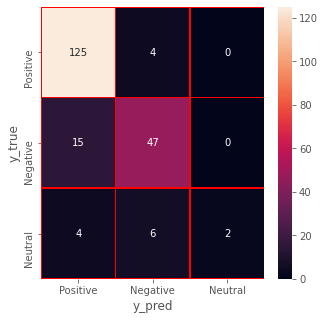

In [27]:
#confussion matrix
y_pred=clf.predict(X_test_bow)
y_true=y_test_bow
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [28]:
print(classification_report(y_test_bow, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       129
           1       0.82      0.76      0.79        62
           2       1.00      0.17      0.29        12

    accuracy                           0.86       203
   macro avg       0.90      0.63      0.66       203
weighted avg       0.86      0.86      0.84       203



<font size="5">Applying Random Forest</font>

In [29]:
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,1))
bow_data = bow_counts.fit_transform(df_reviews.Text_new)

In [30]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    df_reviews['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 50)

In [31]:
forest = ensemble.RandomForestClassifier(n_estimators = 1000, criterion='entropy', random_state = 0)
forest_fit = forest.fit(X_train_bow, y_train_bow)
y_pred = forest_fit.predict(X_test_bow)
accuracy_score(y_test_bow, y_pred)

0.8916256157635468

In [32]:
confusion_matrix(y_test_bow, y_pred)

array([[126,   3,   0],
       [ 12,  50,   0],
       [  3,   4,   5]])

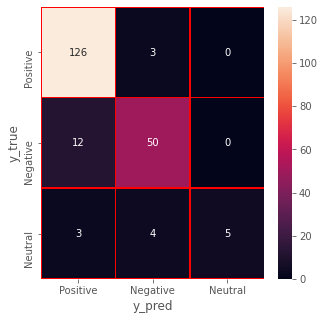

In [33]:
y_pred=forest_fit.predict(X_test_bow)
y_true=y_test_bow
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [34]:
print(classification_report(y_test_bow, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       129
           1       0.88      0.81      0.84        62
           2       1.00      0.42      0.59        12

    accuracy                           0.89       203
   macro avg       0.92      0.73      0.79       203
weighted avg       0.89      0.89      0.88       203



<font size="5">Features Interpretation</font>

In [35]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), 
                                   clf.coef_[0])), 
                          columns= ['words','weights'])

# top-15 more important features for positive reviews
lr_weights.sort_values(['weights'], ascending = False)[:15] 

,words,weights
1031,retired,0.652849
1287,uncommon,0.652827
534,greeat,0.365384
317,despite,0.309316
1033,revenue,0.293491
1062,satisfied,0.255102
1299,unknowingly,0.221722
1153,soyper,0.199648
545,handsome,0.176093
1302,unlikely,0.172075


In [36]:
# top-15 more important features for negative reviews
lr_weights.sort_values(['weights'], ascending = False)[-15:] 


,words,weights
772,mini,-0.193924
771,mine,-0.193924
1283,u,-0.221682
1159,spending,-0.231597
364,encountered,-0.265209
336,doesnt,-0.267678
1160,spends,-0.279571
601,ill,-0.307751
1043,right,-0.316964
1044,rime,-0.316964


<font size="5">TF-IDF model</font>

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, stop_words=stopwords.words('english'), ngram_range=(1,1)) 
tfidf_data = tfidf_counts.fit_transform(df_reviews['Text_new'])

In [38]:
tfidf_data

<1015x1406 sparse matrix of type '<class 'numpy.float64'>'
	with 5921 stored elements in Compressed Sparse Row format>

In [39]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            df_reviews['Sentiment_rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 50)

<font size="5">Applying logistic regression to TF-IDF features</font>

In [40]:
clf_tf_idf = LogisticRegression()
clf_tf_idf.fit(X_train_tfidf,y_train_tfidf)
y_pred = clf_tf_idf.predict(X_test_tfidf)
accuracy_score(y_test_tfidf, y_pred)

0.8620689655172413

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix(y_test_tfidf, y_pred)

array([[121,   8,   0],
       [ 10,  52,   0],
       [  2,   8,   2]])

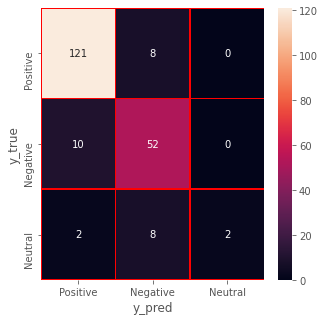

In [43]:
y_pred=clf_tf_idf.predict(X_test_tfidf)
y_true=y_test_tfidf
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [44]:
print(classification_report(y_test_tfidf, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       129
           1       0.76      0.84      0.80        62
           2       1.00      0.17      0.29        12

    accuracy                           0.86       203
   macro avg       0.89      0.65      0.67       203
weighted avg       0.87      0.86      0.85       203

